In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('TeamStats.csv')

In [3]:
df.head()

,Rk,G,Date,Home/Away,Opp,W/L,Tm,Opp.1,FG,FGA,...,OFT,OFTA,OFT%,OORB,OTRB,OAST,OSTL,OBLK,OTOV,OPF
0,1,1,10/17/18,NaN,NOP,L,112,131,39,92,...,17,22,0.773,14,54,36,8,3,12,25
1,2,2,10/20/18,@,LAL,W,124,115,44,96,...,11,18,0.611,9,44,28,8,10,10,21
2,3,3,10/21/18,@,LAC,L,112,115,43,89,...,26,26,1.000,12,49,22,8,7,13,16
3,4,4,10/24/18,NaN,UTA,L,89,100,35,87,...,22,28,0.786,9,47,21,7,5,18,21
4,5,5,10/26/18,NaN,LAC,L,113,133,38,98,...,35,38,0.921,5,44,17,8,4,15,21


In [4]:
df.tail()

,Rk,G,Date,Home/Away,Opp,W/L,Tm,Opp.1,FG,FGA,...,OFT,OFTA,OFT%,OORB,OTRB,OAST,OSTL,OBLK,OTOV,OPF
98,31,31,12/17/18,NaN,PHI,W,123,96,49,87,...,5,7,0.714,12,41,29,3,5,10,15
99,32,32,12/19/18,@,ORL,W,129,90,50,77,...,10,17,0.588,11,33,19,5,3,11,18
100,33,33,12/21/18,NaN,MIN,W,124,98,46,87,...,26,31,0.839,9,39,19,11,5,12,19
101,34,34,12/22/18,@,HOU,L,101,108,42,88,...,15,21,0.714,19,58,22,4,3,9,18
102,35,35,12/26/18,NaN,DEN,W,111,103,42,90,...,15,23,0.652,11,47,29,10,3,12,17


In [5]:
len(df)

103

In [9]:
df['WinLoss'] = (df['W/L'] == 'W')
df['HigherFG%ThanOpponent'] = df['FG%'] > df['OFG%']
df['Higher3PAThanOpponent'] = df['3PA'] > df['O3PA']


KeyError: 'W/L'

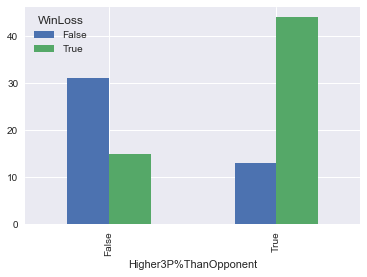

In [8]:
# df2=df.groupby(['HigherFG%ThanOpponent','WinLoss']).size()
# df2=df.unstack()
# print(df2.plot(kind='bar'))


df=df.groupby(['Higher3P%ThanOpponent','WinLoss']).size()
df=df.unstack()
df.plot(kind='bar')

In [ ]:
dfWins = df[df['W/L'].str.contains("W")]
dfLosses = df[df['W/L'].str.contains("L")]

In [ ]:
frames = [dfWins.mean(axis=0), dfLosses.mean(axis=0)]
pd.concat(frames, axis=1, names='Wins')


In [ ]:
df.groupby('W/L').size()

In [ ]:
df.groupby('W/L').hist(figsize=(16, 16))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))